# Webscrape Project
This script will demonstrate usage of the webscape function in python

Stats will be taken from basketball-reference.com and inserted into a SQLite database. A SQL script will extract and translate the data for analysis.
Analaysis of the data will primarily focus on determining what stats are key influences on the outcome of Bucks performances (W/L)

In [1]:
#import libraries
import requests
from bs4 import BeautifulSoup

Beautiful Soup is the parser, requests is the url getter. Now the url to be scraped is defined.

In [2]:
#Url Definition
url = "https://www.basketball-reference.com/teams/MIL/2025/gamelog/#team_game_log_reg::31"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 \
                   (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36"
}

#try the website and see the response

try:
    # Send the request
    response = requests.get(url, headers=headers)
    
    # Check for successful request
    if response.status_code != 200:
        print(f"Failed to retrieve the page: {response.status_code}")
    else:
        html_content = response.text

        # Parse HTML with BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')

        # Extract page title
        title = soup.title.text if soup.title else "No title found"
        print("Page Title:", title)

        # Extract and print all paragraphs
        paragraphs = soup.find_all('p')
        for idx, para in enumerate(paragraphs, 1):
            print(f"Paragraph {idx}:", para.get_text(strip=True))
            
        # Example of waiting before making another request
        time.sleep(2)  # Wait for 2 seconds
        
except Exception as e:
    print("An error occurred:", e)

Page Title: 2024-25 Milwaukee Bucks Team Game Log | Basketball-Reference.com
Paragraph 1: via Sports Logos.net
Paragraph 2: About logos
Paragraph 3: Record:48-34, 5th inNBAEastern Conference
Paragraph 4: Last Game:W 140-133 
         vs.  
          DET
Paragraph 5: Coach:Doc Rivers(48-34)
Paragraph 6: Executive:Jon Horst
Paragraph 7: PTS/G:115.5 (11th of 30)Opp PTS/G:113.0 (13th of 30)
Paragraph 8: SRS: 2.12 (11th of 30)Pace: 99.3 (13th of 30)
Paragraph 9: Off Rtg: 115.9 (11th of 30)Def Rtg: 113.4 (12th of 30)Net Rtg: +2.5 (11th of 30)
Paragraph 10: Expected W-L: 47-35 (11th of 30)
Paragraph 11: Arena:Fiserv ForumAttendance:732,014 (17th of 30)
Paragraph 12: Click two rows to sum games. Click on the Gtm value to see the team's season totals through that game.
Paragraph 13: Bucks Franchise Index
Paragraph 14: EverySports Reference Social Media Account
Paragraph 15: Site Last Updated:Friday, April 18,  7:31AM
Paragraph 16: Question, Comment, Feedback, or Correction?
Paragraph 17: Subscr

The headers portion of this script is like what you say when you ring someones doorbell. In this case its telling the website hey I am from a regular browser. This is to prevent the website from responding with "no we dont talk to robots"

That works for the basic text scraping. However, this web browser has a table that I believe to be operated thru Java script. I thought I would be out of luck since I don't know Java yet, however I found a button that converts the table to CSV format. I am going to use Selenium to click the button.

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Initialize Safari WebDriver
driver = webdriver.Safari()

# Navigate to the target webpage
url = "https://www.basketball-reference.com/teams/MIL/2025/gamelog/#team_game_log_reg::31"
driver.get(url)

# Wait helper with a timeout (e.g., 10 seconds)
wait = WebDriverWait(driver, 10)

# Locate the dropdown menu element that contains "Share & Export"
share_export_menu = wait.until(
    EC.visibility_of_element_located(
        (By.XPATH, '//li[contains(@class,"hasmore") and .//span[contains(text(),"Share & Export")]]')
    )
)

# Scroll the dropdown element into view
driver.execute_script("arguments[0].scrollIntoView(true);", share_export_menu)
time.sleep(1)

# Hover over the dropdown so that its contents appear
actions = ActionChains(driver)
actions.move_to_element(share_export_menu).perform()
time.sleep(1)
#IF WANT TO USE CSV, ADD CSV CODE HERE

# Use a more robust locator: locate the button using its tip attribute text.
# This button's tip contains "Convert the table below to comma-separated values"
csv_button = wait.until(
    EC.presence_of_element_located(
        (By.XPATH, '//button[contains(@tip, "Convert the table below to comma-separated values")]')
    )
)

# Scroll the CSV button into view in case it's hidden
driver.execute_script("arguments[0].scrollIntoView(true);", csv_button)
time.sleep(0.5)

# Click the CSV button using JavaScript to bypass any clickable issues
driver.execute_script("arguments[0].click();", csv_button)

# After clicking the CSV button, wait until the CSV data appears
pre_element = wait.until(
    EC.visibility_of_element_located((By.ID, "csv_team_game_log_reg"))
)

# Extract the CSV text from the <pre> tag.
csv_data = pre_element.text
print("CSV Data extracted:")
print(csv_data)

# Optional: wait a few seconds before closing the browser
time.sleep(3)

# Close the browser
driver.quit()

#IF WANT TO USE EXPORT AS, ADD EXPORT AS CODE HERE
# END ADDED CODE HERE

CSV Data extracted:
--- When using SR data, please cite us and provide a link and/or a mention.


 
,,,,,Score,Score,Score,Score,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent
Rk,Gtm,Date,,Opp,Rslt,Tm,Opp,OT,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,FG,FGA▼,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
1,47,2025-02-02,,MEM,L,119,132,,44,91,.484,20,45,.444,24,46,.522,.593,11,19,.579,8,28,36,32,7,5,13,21,52,107,.486,14,39,.359,38,68,.559,.551,14,22,.636,22,39,61,37,9,5,12,15
2,82,2025-04-13,,DET,W,140,133,OT,50,86,.581,23,44,.523,27,42,.643,.715,17,22,.773,6,32,38,30,5,7,21,17,51,107,.477,22,59,.373,29,48,.604,.579,9,14,.643,14,28,42,35,9,3,13,19
3,58,2025-02-27,,DEN,W,121,112,,42,

the portion of code below can be used to click the csv button and scrape the data from the csv pre text

In [ ]:
# Use a more robust locator: locate the button using its tip attribute text.
# This button's tip contains "Convert the table below to comma-separated values"
csv_button = wait.until(
    EC.presence_of_element_located(
        (By.XPATH, '//button[contains(@tip, "Convert the table below to comma-separated values")]')
    )
)

# Scroll the CSV button into view in case it's hidden
driver.execute_script("arguments[0].scrollIntoView(true);", csv_button)
time.sleep(0.5)

# Click the CSV button using JavaScript to bypass any clickable issues
driver.execute_script("arguments[0].click();", csv_button)

# After clicking the CSV button, wait until the CSV data appears
pre_element = wait.until(
    EC.visibility_of_element_located((By.ID, "csv_team_game_log_reg"))
)

# Extract the CSV text from the <pre> tag.
csv_data = pre_element.text
print("CSV Data extracted:")
print(csv_data)

# Optional: wait a few seconds before closing the browser
time.sleep(3)

# Close the browser
driver.quit()


the portion of code below allows to export the table as an excel workbook

In [ ]:
# Use a more robust locator: locate the button using its tip attribute text.
# This button's tip contains "Export table as"
export_button = wait.until(
    EC.presence_of_element_located(
        (By.XPATH, '//button[contains(@tip, "Export table as")]')
    )
)

# Scroll the export button into view in case it's hidden
driver.execute_script("arguments[0].scrollIntoView(true);", export_button)
time.sleep(0.5)

# Click the export button using JavaScript to bypass any clickable issues
driver.execute_script("arguments[0].click();", export_button)
time.sleep(3)

# Optional: wait a few seconds before closing the browser
time.sleep(3)

# Close the browser
driver.quit()

The scraped text has some headers that arent particularly useful so lets trim them out

In [4]:
x = csv_data.find(',,')
cropped_data = csv_data[x:]
cropped_data

',,,,,Score,Score,Score,Score,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Team,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent,Opponent\nRk,Gtm,Date,,Opp,Rslt,Tm,Opp,OT,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,FG,FGA▼,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF\n1,47,2025-02-02,,MEM,L,119,132,,44,91,.484,20,45,.444,24,46,.522,.593,11,19,.579,8,28,36,32,7,5,13,21,52,107,.486,14,39,.359,38,68,.559,.551,14,22,.636,22,39,61,37,9,5,12,15\n2,82,2025-04-13,,DET,W,140,133,OT,50,86,.581,23,44,.523,27,42,.643,.715,17,22,.773,6,32,38,30,5,7,21,17,51,107,.477,22,59,.373,29,48,.604,.579,9,14,.643,14,28,42,35,9,3,13,19\n3,58,2025-02-27,,DEN,W,121,112,,42,90,.467,14,34,.412,28,56,.500,.544,23,28,.821,7,41,48,25,8,4,11,11,47,105,.448,9,34,.265,38,71,

Now the data is loaded into the Pandas dataframe and then into the SQLite database.

In [15]:
# Split into individual lines
import pandas as pd
from io import StringIO
# Split into individual lines
lines = cropped_data.splitlines()

# 1. Find the grouping‑header line (the one containing “Score,Score”)
for idx, ln in enumerate(lines):
    if "Score,Score" in ln and "Team,Team" in ln:
        grouping_idx = idx
        break
else:
    raise ValueError("Could not find the grouping header row")

# 2. Build a new CSV text starting at that grouping header
#    which gives us exactly two header rows followed by data
clean_csv = "\n".join(lines[grouping_idx:])
df = pd.read_csv(StringIO(clean_csv), header=[0, 1])
print(df.head())

  Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk                Gtm               Date Unnamed: 3_level_1   
0                1.0               47.0         2025-02-02                NaN   
1                2.0               82.0         2025-04-13                NaN   
2                3.0               58.0         2025-02-27                NaN   
3                4.0               53.0         2025-02-12                  @   
4                5.0               21.0         2024-12-04                NaN   

  Unnamed: 4_level_0 Score                Team  ... Opponent                 \
                 Opp  Rslt   Tm  Opp   OT   FG  ...      FTA    FT% ORB DRB   
0                MEM     L  119  132  NaN   44  ...       22  0.636  22  39   
1                DET     W  140  133   OT   50  ...       14  0.643  14  28   
2                DEN     W  121  112  NaN   42  ...       11  0.818  14  41   
3                MIN     W  103  101 

In [11]:
import pandas as pd
from io import StringIO
# Split into individual lines
lines = cropped_data.splitlines()

# 1. Find the grouping‑header line (the one containing “Score,Score”)
for idx, ln in enumerate(lines):
    if "Score,Score" in ln and "Team,Team" in ln:
        grouping_idx = idx
        break
else:
    raise ValueError("Could not find the grouping header row")

# 2. Build a new CSV text starting at that grouping header
#    which gives us exactly two header rows followed by data
clean_csv = "\n".join(lines[grouping_idx:])

# 3. Read with a two‑row header
df = pd.read_csv(StringIO(clean_csv), header=[0, 1])

# 4. Flatten the MultiIndex into one level
df.columns = [f"{group}_{field}" for group, field in df.columns]

print(df.head())

   Unnamed: 0_level_0_Rk  Unnamed: 1_level_0_Gtm Unnamed: 2_level_0_Date  \
0                    1.0                    47.0              2025-02-02   
1                    2.0                    82.0              2025-04-13   
2                    3.0                    58.0              2025-02-27   
3                    4.0                    53.0              2025-02-12   
4                    5.0                    21.0              2024-12-04   

  Unnamed: 3_level_0_Unnamed: 3_level_1 Unnamed: 4_level_0_Opp Score_Rslt  \
0                                   NaN                    MEM          L   
1                                   NaN                    DET          W   
2                                   NaN                    DEN          W   
3                                     @                    MIN          W   
4                                   NaN                    ATL          L   

   Score_Tm  Score_Opp Score_OT  Team_FG  ...  Opponent_FTA  Opponent_FT%  \
0  

In [26]:
# Now, load the CSV text into a Pandas DataFrame
from io import StringIO
import pandas as pd
import sqlite3

csv_buffer = StringIO(cropped_data)
# 2. Read it, telling pandas that the first two rows are headers
df = pd.read_csv(pd.io.common.StringIO(cropped_data), header=[0, 1])

# 3. Combine the two levels of the MultiIndex into single strings
#    You can choose any separator you like (here we use '_')
new_columns = [f"{lvl1}_{lvl2}" for lvl1, lvl2 in df.columns]
df.columns = new_columns

# 4. Now df has a single header row:
print(df)

# Connect to (or create) an SQLite database and insert the DataFrame into a table
db_name = "NBA_25.db"      # name of your database file
table_name = "TeamStats"            # name of the table in the database
conn = sqlite3.connect(db_name)
df.to_sql(table_name, conn, if_exists='replace', index=False)
conn.close()

print(f"Data inserted into SQLite database '{db_name}' in table '{table_name}'.")

    Unnamed: 0_level_0_Rk  Unnamed: 1_level_0_Gtm Unnamed: 2_level_0_Date  \
0                     1.0                    47.0              2025-02-02   
1                     2.0                    82.0              2025-04-13   
2                     3.0                    58.0              2025-02-27   
3                     4.0                    53.0              2025-02-12   
4                     5.0                    21.0              2024-12-04   
..                    ...                     ...                     ...   
78                   79.0                    27.0              2024-12-21   
79                   80.0                     8.0              2024-11-07   
80                   81.0                    18.0              2024-11-26   
81                   82.0                    68.0              2025-03-18   
82                    NaN                     NaN                     NaN   

   Unnamed: 3_level_0_Unnamed: 3_level_1 Unnamed: 4_level_0_Opp Score_Rslt 

In [35]:
from collections import Counter

# Step 1: Connect to SQLite database
conn = sqlite3.connect("NBA_25.db")  # adjust path if needed

# Step 2: Load original TeamStats table
df_original = pd.read_sql_query("SELECT * FROM TeamStats", conn)

# Step 3: Extract row 0 as new column headers
raw_headers = df_original.iloc[0].tolist()

# Step 4: Make sure column headers are unique
def make_unique_columns(columns):
    counts = Counter()
    unique_cols = []
    for col in columns:
        counts[col] += 1
        if counts[col] == 1:
            unique_cols.append(col)
        else:
            unique_cols.append(f"{col}_{counts[col] - 1}")
    return unique_cols

unique_headers = make_unique_columns(raw_headers)

# Step 5: Remove the header rows and reassign new column names
df_cleaned = df_original[0:].copy()
df_cleaned.columns = unique_headers
df_cleaned.reset_index(drop=True, inplace=True)

# Step 6: Save cleaned data to new table in the same database
df_cleaned.to_sql("TeamStats_Cleaned", conn, if_exists="replace", index=False)

# Optional: Close connection
conn.close()

In [32]:
# 1. Grab that first row as the real column names
new_cols = df.iloc[0]

# 2. Drop that row from the data
df = df.iloc[1:].reset_index(drop=True)

# 3. Assign the proper column names
df.columns = new_cols

# Now df has correct headers and all your data rows back in place
print(df.head())

0  1.0  47.0  2025-02-02  NaN  MEM  L  119  132  NaN  44  ...  22  0.636  22  \
0  2.0  82.0  2025-04-13  NaN  DET  W  140  133   OT  50  ...  14  0.643  14   
1  3.0  58.0  2025-02-27  NaN  DEN  W  121  112  NaN  42  ...  11  0.818  14   
2  4.0  53.0  2025-02-12    @  MIN  W  103  101  NaN  39  ...  15  0.867  15   
3  5.0  21.0  2024-12-04  NaN  ATL  L  104  119  NaN  33  ...  22  0.909  15   
4  6.0  46.0  2025-01-31    @  SAS  L  118  144  NaN  43  ...  25  0.800  13   

0  39  61  37   9   5  12  15  
0  28  42  35   9   3  13  19  
1  41  55  28   8   2  13  17  
2  44  59  27   4   6  14  13  
3  39  54  29  16   3  14  25  
4  40  53  37   7  11   6  20  

[5 rows x 51 columns]


In [21]:
#import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
from io import StringIO
from collections import Counter
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Initialize Safari WebDriver
driver = webdriver.Safari()

# Navigate to the target webpage
url = "https://www.basketball-reference.com/teams/MIL/2025/gamelog/#team_game_log_reg::31"
driver.get(url)

# Wait helper with a timeout (e.g., 10 seconds)
wait = WebDriverWait(driver, 10)

# Locate the dropdown menu element that contains "Share & Export"
share_export_menu = wait.until(
    EC.visibility_of_element_located(
        (By.XPATH, '//li[contains(@class,"hasmore") and .//span[contains(text(),"Share & Export")]]')
    )
)

# Scroll the dropdown element into view
driver.execute_script("arguments[0].scrollIntoView(true);", share_export_menu)
time.sleep(1)

# Hover over the dropdown so that its contents appear
actions = ActionChains(driver)
actions.move_to_element(share_export_menu).perform()
time.sleep(1)
#IF WANT TO USE CSV, ADD CSV CODE HERE

# Use a more robust locator: locate the button using its tip attribute text.
# This button's tip contains "Convert the table below to comma-separated values"
csv_button = wait.until(
    EC.presence_of_element_located(
        (By.XPATH, '//button[contains(@tip, "Convert the table below to comma-separated values")]')
    )
)

# Scroll the CSV button into view in case it's hidden
driver.execute_script("arguments[0].scrollIntoView(true);", csv_button)
time.sleep(0.5)

# Click the CSV button using JavaScript to bypass any clickable issues
driver.execute_script("arguments[0].click();", csv_button)

# After clicking the CSV button, wait until the CSV data appears
pre_element = wait.until(
    EC.visibility_of_element_located((By.ID, "csv_team_game_log_reg"))
)

# Extract the CSV text from the <pre> tag.
csv_data = pre_element.text
print("CSV Data extracted:")
#print(csv_data)

# Optional: wait a few seconds before closing the browser
time.sleep(3)

# Close the browser
driver.quit()

#IF WANT TO USE EXPORT AS, ADD EXPORT AS CODE HERE
# END ADDED CODE HERE
######################################End of web driving commands#################

x = csv_data.find(',,')
cropped_data = csv_data[x:]

# Split into individual lines
lines = cropped_data.splitlines()

# 1. Find the grouping‑header line (the one containing “Score,Score”)
for idx, ln in enumerate(lines):
    if "Score,Score" in ln and "Team,Team" in ln:
        grouping_idx = idx
        break
else:
    raise ValueError("Could not find the grouping header row")

# 2. Build a new CSV text starting at that grouping header
#    which gives us exactly two header rows followed by data
clean_csv = "\n".join(lines[grouping_idx:])
df = pd.read_csv(StringIO(clean_csv), header=[0, 1])
print(df.head())

####################################################################################################

# 1. Split into lines and locate the "real" header row
lines = csv_data.strip().splitlines()

# Find the index of the line that starts with "Rk,Gtm,Date"
for idx, line in enumerate(lines):
    if line.startswith("Rk,Gtm,Date"):
        header_idx = idx
        break

# Keep only from the real header on
clean_lines = lines[header_idx:]
clean_csv = "\n".join(clean_lines)

# 2. Read using the single header row
df = pd.read_csv(StringIO(clean_csv), header=0)

# 3. Drop any accidental Unnamed columns
df = df.loc[:, ~df.columns.str.startswith("Unnamed")]

# 4. (Optional) If you still have duplicate column names (e.g. two "Opp"), you can make them unique:

def make_unique(cols):
    counts = Counter()
    unique = []
    for c in cols:
        counts[c] += 1
        if counts[c] == 1:
            unique.append(c)
        else:
            unique.append(f"{c}_{counts[c]-1}")
    return unique

df.columns = make_unique(df.columns)

# 5. Inspect the result
print(df.head())

####################################################################################################

# Connect to (or create) an SQLite database and insert the DataFrame into a table
db_name = "NBA_25.db"      # name of your database file
table_name = "TeamStats"            # name of the table in the database
conn = sqlite3.connect(db_name)
df.to_sql(table_name, conn, if_exists='replace', index=False)
conn.close()

print(f"Data inserted into SQLite database '{db_name}' in table '{table_name}'.")

CSV Data extracted:
  Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk                Gtm               Date Unnamed: 3_level_1   
0                1.0               47.0         2025-02-02                NaN   
1                2.0               82.0         2025-04-13                NaN   
2                3.0               58.0         2025-02-27                NaN   
3                4.0               53.0         2025-02-12                  @   
4                5.0               21.0         2024-12-04                NaN   

  Unnamed: 4_level_0 Score                Team  ... Opponent                 \
                 Opp  Rslt   Tm  Opp   OT   FG  ...      FTA    FT% ORB DRB   
0                MEM     L  119  132  NaN   44  ...       22  0.636  22  39   
1                DET     W  140  133   OT   50  ...       14  0.643  14  28   
2                DEN     W  121  112  NaN   42  ...       11  0.818  14  41   
3                

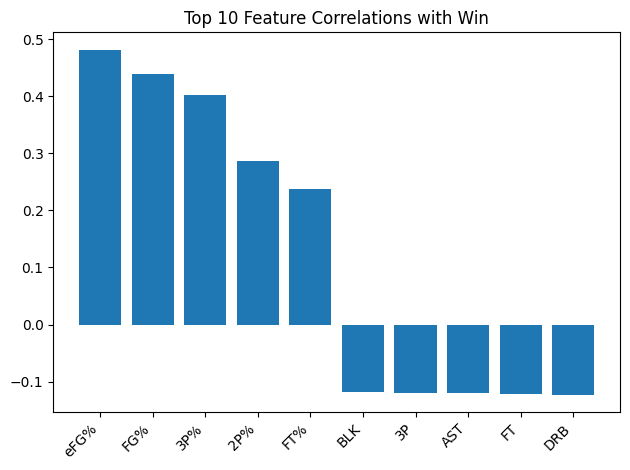

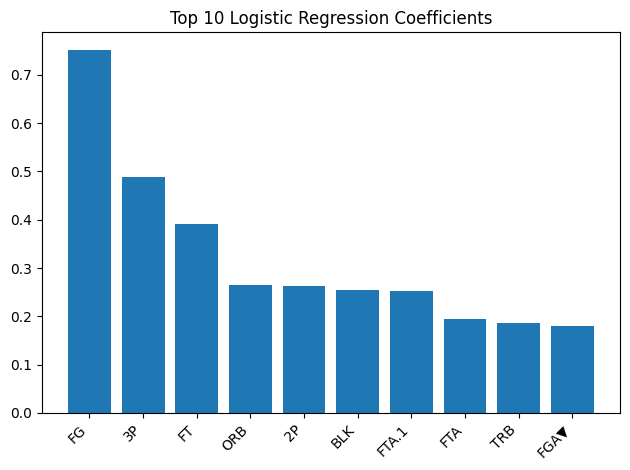

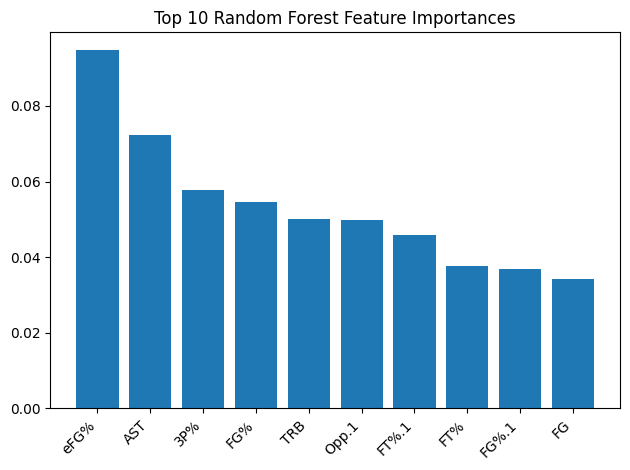

Logistic train/test accuracy: 1.000 / 0.880
RandomForest train/test accuracy: 1.000 / 0.880


In [25]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 1) Connect and load the table
DB_PATH = "NBA_25.db"                  # adjust if needed
TABLE_NAME   = "TeamStats"          # your cleaned table name

# 1) Load data
conn = sqlite3.connect(DB_PATH)
df   = pd.read_sql_query(f"SELECT * FROM {TABLE_NAME}", conn)
conn.close()

# 2) Preprocess
df['Win'] = (df['Rslt'] == 'W').astype(int)
drop_cols = ['Rk','Gtm','Date','Opp','Rslt','Tm']
X = df.drop(columns=drop_cols + ['Win'])
X = X.apply(pd.to_numeric, errors='coerce')\
     .dropna(axis='columns', how='all')\
     .fillna(lambda col: col.median())
y = df['Win']

# 3) Correlation
corr     = pd.concat([X,y], axis=1).corr()['Win'].drop('Win').sort_values(ascending=False)
top_corr = corr.head(10)

# 4) Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5) Fit Models
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)
coef = pd.Series(logit.coef_[0], index=X.columns).sort_values(ascending=False).head(10)

rf = RandomForestClassifier(random_state=42, n_estimators=200)
rf.fit(X_train, y_train)
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)

# 6) Plotting

# a) Top 10 correlations
plt.figure()
plt.bar(top_corr.index, top_corr.values)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Feature Correlations with Win")
plt.tight_layout()
plt.show()

# b) Top 10 logistic‐regression coefficients
plt.figure()
plt.bar(coef.index, coef.values)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Logistic Regression Coefficients")
plt.tight_layout()
plt.show()

# c) Top 10 random‑forest importances
plt.figure()
plt.bar(imp.index, imp.values)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Random Forest Feature Importances")
plt.tight_layout()
plt.show()

# 7) Print accuracies
print("Logistic train/test accuracy:",
      f"{logit.score(X_train,y_train):.3f} / {logit.score(X_test,y_test):.3f}")
print("RandomForest train/test accuracy:",
      f"{rf.score(X_train,y_train):.3f} / {rf.score(X_test,y_test):.3f}")